<a href="https://colab.research.google.com/github/yootaka/AiQuest/blob/main/PBL08_en4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#家電量販店　商品需要予測
#ライブラリーのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Google ドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_path = "/content/drive/My Drive/Colab Notebooks/AiQuest/PBL08_en4"


In [4]:
#csvファイルの読み込み　ヘッダー名称がうまく取り込めないため、names指定
csv_train1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AiQuest/PBL08_en4/sales_history.csv', sep=",",engine="python", skiprows=1,names=['ProductID', 'Date','SalesCount'])
csv_train2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AiQuest/PBL08_en4/sales_mikomi.csv', sep=",",engine="python", skiprows=1,names=['ProductID', 'Date','SalesCount'])
csv_train3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AiQuest/PBL08_en4/waribiki_history.csv', sep=",",engine="python", skiprows=1,names=['ProductID', 'Date','Discount'])
csv_train4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AiQuest/PBL08_en4/waribiki_mikomi.csv', sep=",",engine="python", skiprows=1,names=['ProductID', 'Date','Discount'])

In [14]:
#csv_train1.reset_index()

In [5]:
csv_train1.keys()

Index(['ProductID', 'Date', 'SalesCount'], dtype='object')

In [6]:
csv_train1

,ProductID,Date,SalesCount
0,1,2010-01,142
1,1,2010-02,150
2,1,2010-03,217
3,1,2010-04,190
4,1,2010-05,193
...,...,...,...
9886,84,2019-06,953
9887,84,2019-07,1034
9888,84,2019-08,2099
9889,84,2019-09,952


In [7]:
print(csv_train1.shape)
print(csv_train2.shape)
print(csv_train3.shape)
print(csv_train4.shape)

(9891, 3)
(168, 3)
(9891, 3)
(1176, 3)


In [8]:
#テーブルの結合
csv_train5 = pd.concat([csv_train1,csv_train2],sort=False) #sales
csv_train6 = pd.concat([csv_train3,csv_train4],sort=False) #waribiki

print(csv_train5.shape)
print(csv_train6.shape)

(10059, 3)
(11067, 3)


In [9]:
#テーブルの結合(merge)
csv_train = pd.merge(csv_train5,csv_train6,on=["ProductID","Date"],how='outer')

In [10]:
csv_train

,ProductID,Date,SalesCount,Discount
0,1,2010-01,142.0,0
1,1,2010-02,150.0,0
2,1,2010-03,217.0,0
3,1,2010-04,190.0,0
4,1,2010-05,193.0,0
...,...,...,...,...
11062,84,2020-08,NaN,0
11063,84,2020-09,NaN,20
11064,84,2020-10,NaN,0
11065,84,2020-11,NaN,20


In [11]:
#日付を年と月に分割
csv_train['Year']=csv_train['Date'].str[:4]
csv_train['Month']=csv_train['Date'].str[-2:]

In [12]:
csv_train

,ProductID,Date,SalesCount,Discount,Year,Month
0,1,2010-01,142.0,0,2010,01
1,1,2010-02,150.0,0,2010,02
2,1,2010-03,217.0,0,2010,03
3,1,2010-04,190.0,0,2010,04
4,1,2010-05,193.0,0,2010,05
...,...,...,...,...,...,...
11062,84,2020-08,NaN,0,2020,08
11063,84,2020-09,NaN,20,2020,09
11064,84,2020-10,NaN,0,2020,10
11065,84,2020-11,NaN,20,2020,11


In [13]:
#欠損値の確認///欠損値無し・・・目的変数であるSalesCountはNaNあり
csv_train.isnull().any(axis=0)

ProductID     False
Date          False
SalesCount     True
Discount      False
Year          False
Month         False
dtype: bool

In [14]:
#統計量計算
csv_train.describe()

,ProductID,SalesCount,Discount
count,11067.000000,10059.000000,11067.000000
mean,42.456040,1462.186897,5.626638
std,24.236372,3496.128705,9.978874
min,1.000000,13.000000,0.000000
25%,21.000000,346.000000,0.000000
50%,42.000000,622.000000,0.000000
75%,63.000000,1240.000000,10.000000
max,84.000000,82124.000000,60.000000


<function matplotlib.pyplot.show>

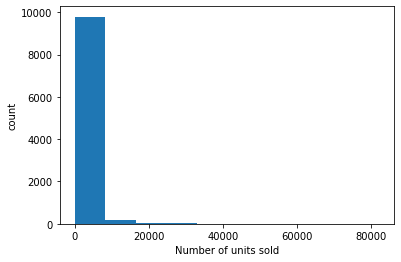

In [15]:
#販売個数の分布
plt.hist(csv_train['SalesCount'])
plt.xlabel('Number of units sold')
plt.ylabel('count')
plt.show

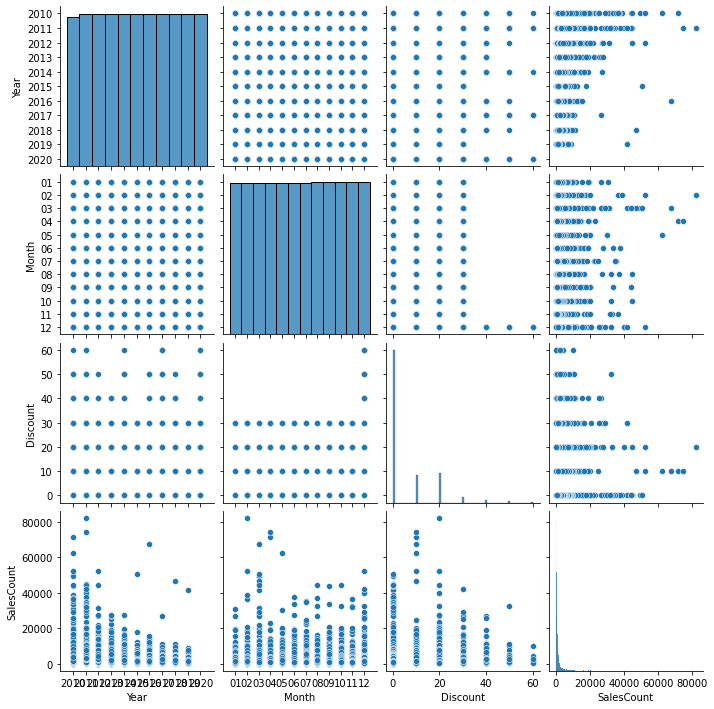

In [16]:
#各項目とSalesCountの相関を確認
sns.pairplot(csv_train,vars=["Year","Month","Discount","SalesCount"])

In [17]:
csv_train

,ProductID,Date,SalesCount,Discount,Year,Month
0,1,2010-01,142.0,0,2010,01
1,1,2010-02,150.0,0,2010,02
2,1,2010-03,217.0,0,2010,03
3,1,2010-04,190.0,0,2010,04
4,1,2010-05,193.0,0,2010,05
...,...,...,...,...,...,...
11062,84,2020-08,NaN,0,2020,08
11063,84,2020-09,NaN,20,2020,09
11064,84,2020-10,NaN,0,2020,10
11065,84,2020-11,NaN,20,2020,11


In [18]:
#属性変換　varchar to int
csv_train['ProductID'] = csv_train['ProductID'].astype(int)
csv_train['Date'] = csv_train['Date'].astype(object)
#csv_train['SalesCount'] = csv_train['SalesCount'].astype(int)
csv_train['Discount'] = csv_train['Discount'].astype(int)
csv_train['Year'] = csv_train['Year'].astype(int)
csv_train['Month'] = csv_train['Month'].astype(int)

In [31]:
csv_train

,ProductID,Date,SalesCount,Discount,Year,Month
0,1,2010-01,142.0,0,2010,1
1,1,2010-02,150.0,0,2010,2
2,1,2010-03,217.0,0,2010,3
3,1,2010-04,190.0,0,2010,4
4,1,2010-05,193.0,0,2010,5
...,...,...,...,...,...,...
11062,84,2020-08,NaN,0,2020,8
11063,84,2020-09,NaN,20,2020,9
11064,84,2020-10,NaN,0,2020,10
11065,84,2020-11,NaN,20,2020,11


In [32]:
#データの分割
#Train  2010-2019
#Test   2020
Train = csv_train[csv_train.Year<2020] #学習
Test =  csv_train[csv_train.Year==2020] #テスト

In [33]:
Train

,ProductID,Date,SalesCount,Discount,Year,Month
0,1,2010-01,142.0,0,2010,1
1,1,2010-02,150.0,0,2010,2
2,1,2010-03,217.0,0,2010,3
3,1,2010-04,190.0,0,2010,4
4,1,2010-05,193.0,0,2010,5
...,...,...,...,...,...,...
10054,82,2019-12,1573.0,10,2019,12
10055,83,2019-11,134.0,0,2019,11
10056,83,2019-12,338.0,20,2019,12
10057,84,2019-11,958.0,0,2019,11


In [34]:
# XGBoostのライブラリのインポート
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [35]:
# xgboostモデルの作成
reg = xgb.XGBRegressor()

In [36]:
# 説明変数、目的変数を格納 axis=1 x方向
X_train = Train.drop(['SalesCount','Date'], axis=1)
y_train = Train['SalesCount']
#X_val = Val.drop(['SalesCount','Date'], axis=1)
#y_val = Val['SalesCount']
X_test = Test.drop(['SalesCount','Date'], axis=1)

In [37]:
# ハイパーパラメータ探索
#{'alpha': 0.0, 'colsample_bytree': 0.6, 'eta': 0.1, 'gamma': 0.1, 'lambda': 1.0, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.9} 0.8358415312594161
#[Parallel(n_jobs=1)]: Done 33600 out of 33600 | elapsed: 24.1min finished
#②{'alpha': 0.0, 'colsample_bytree': 0.4, 'eta': 0.1, 'gamma': 0.1, 'lambda': 1.0, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.9} 0.8453318693069807
#[Parallel(n_jobs=1)]: Done 7680 out of 7680 | elapsed:  5.6min finished
reg_cv = GridSearchCV(reg, {'max_depth': [7], 'min_child_weight': [4],'eta':[0.1],'colsample_bytree':[0.1,0.2,0.3,0.4,0.5,0.6,0.7],'alpha':[0.0],'subsample':[0.9,1.0],'gamma':[0.1],'lambda':[1.0]}, verbose=1)
reg_cv.fit(X_train, y_train)
print(reg_cv.best_params_, reg_cv.best_score_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[17:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   17.6s finished


[17:24:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'alpha': 0.0, 'colsample_bytree': 0.5, 'eta': 0.1, 'gamma': 0.1, 'lambda': 1.0, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 1.0} -0.0911200085651307


In [38]:
# ハイパーパラメータ探索結果
#①{'alpha': 0.0, 'colsample_bytree': 0.6, 'eta': 0.1, 'gamma': 0.1, 'lambda': 1.0, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.9} 0.8358415312594161
#[Parallel(n_jobs=1)]: Done 33600 out of 33600 | elapsed: 24.1min finished
#②{'alpha': 0.0, 'colsample_bytree': 0.4, 'eta': 0.1, 'gamma': 0.1, 'lambda': 1.0, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.9} 0.8453318693069807
#[Parallel(n_jobs=1)]: Done 7680 out of 7680 | elapsed:  5.6min finished
#③{'alpha': 0.0, 'colsample_bytree': 0.6, 'eta': 0.1, 'gamma': 0.1, 'lambda': 1.0, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 1.0} 0.8495117676020616
#[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    2.4s finished
# 改めて最適パラメータで学習
reg = xgb.XGBRegressor(**reg_cv.best_params_)
reg.fit(X_train, y_train)

[17:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=0.0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.1,
             importance_type='gain', lambda=1.0, learning_rate=0.1,
             max_delta_step=0, max_depth=7, min_child_weight=4, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1.0, verbosity=1)

In [39]:
# 学習データを使って予測
pred_train = reg.predict(X_train)

In [40]:
X_train.head()

,ProductID,Discount,Year,Month
0,1,0,2010,1
1,1,0,2010,2
2,1,0,2010,3
3,1,0,2010,4
4,1,0,2010,5


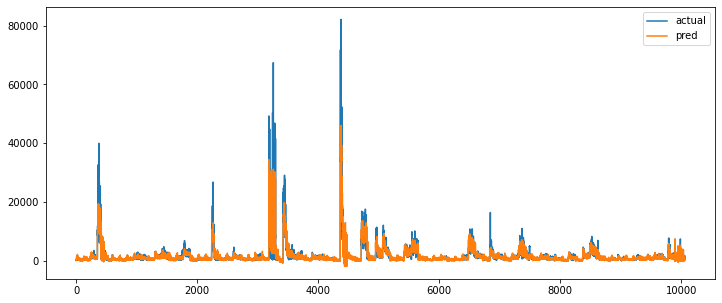

In [41]:
# 予測値が妥当か確認
train_value = y_train.values
_df = pd.DataFrame({'actual':train_value,'pred':pred_train})
_df.plot(figsize=(12,5))

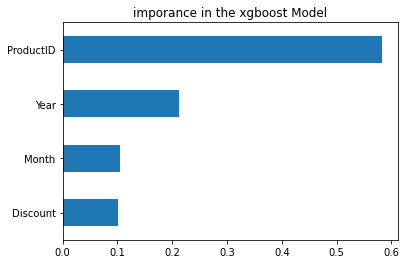

In [42]:
# feature importance のプロット
importances = pd.Series(reg.feature_importances_, index = X_train.columns)
importances = importances.sort_values()
importances.plot(kind = "barh")
plt.title("imporance in the xgboost Model")
plt.show()

In [43]:
# テストデータX_testに対し予測値の算出
pred_test = reg.predict(X_test)

In [44]:
pred_test

array([  73.71295,   -4.79446,  245.25923, ...,  750.82275, 1835.9034 ,
       2161.998  ], dtype=float32)

In [45]:
pred_test.shape

(1008,)

In [49]:
pred_test.min

<function ndarray.min>

In [ ]:
csv_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CarFuel/test.csv', sep=",",engine="python")
# 結果を張り付け、ファイル出力
sample = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CarFuel/sample_submit.csv',header=None)
sample[1] = pred_test
sample.to_csv("/content/drive/My Drive/Colab Notebooks/CarFuel/submit04.csv",index=None,header=None)